In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import mplcyberpunk
import matplotlib.ticker as mtick
import numpy as np

In [29]:
df = pd.read_csv('MCAR_Simulation_Top5 (neu)')
# df = pd.read_csv('MCAR_Simulation_Top5-10 (neu)')
# df = pd.read_csv('MNAR_Simulation_Top5_(0.1 und 0.1-0.9) (neu)')
# df = pd.read_csv('MNAR_Simulation_Top5_(0.2 und 0.1-0.9) (neu)')
# df = pd.read_csv('MNAR_Simulation_Top5_(0.3 und 0.1-0.9) (neu)')
df.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
print(np.round(df, 2).to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrrrr}
\toprule
 chance &    Mean &   MSE OLS &  SE OLS &  Alpha OLS &  Mean KNN\_1 &  MSE KNN\_1 &  SE KNN\_1 &  Alpha KNN\_1 &  Mean KNN\_3 &  MSE KNN\_3 &  SE KNN\_3 &  Alpha KNN\_3 &  Mean KNN\_5 &  MSE KNN\_5 &  SE KNN\_5 &  Alpha KNN\_5 \\
\midrule
    0.1 & 1333.79 & 134219.67 &   22.95 &       1.00 &     1328.90 &  144725.96 &     23.31 &         1.00 &     1330.51 &  101799.43 &     23.15 &         1.00 &     1329.30 &  101453.58 &     23.13 &         1.00 \\
    0.2 & 1333.79 & 133642.52 &   22.68 &       1.00 &     1324.53 &  148937.28 &     23.36 &         1.00 &     1327.90 &  102555.77 &     23.04 &         1.00 &     1325.81 &  101634.18 &     23.00 &         1.00 \\
    0.3 & 1333.82 & 133538.40 &   22.39 &       1.00 &     1320.61 &  150109.56 &     23.37 &         1.00 &     1325.34 &  102773.40 &     22.91 &         1.00 &     1321.95 &  102668.82 &     22.83 &         1.00 \\
    0.4 & 1334.05 & 133891.57 &   22.13 &       1.00 &     1318

C:\Users\Admin\AppData\Local\Temp\ipykernel_17388\2340664551.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(np.round(df, 2).to_latex(index=False))


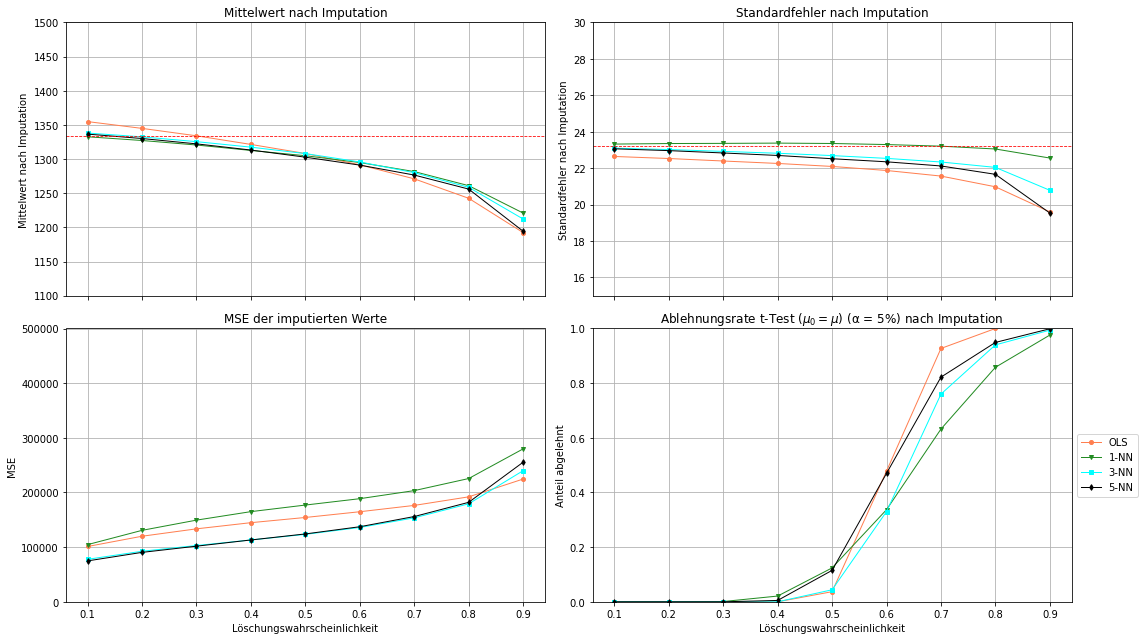

In [40]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs

ax1.grid(True); ax2.grid(True); ax3.grid(True); ax4.grid(True)

# Plotting for the first plot
ax1.plot(df['chance'], df['Mean'], marker='o', color='coral', linewidth=1, markersize=4, label='Mean OLS')
ax1.plot(df['chance'], df['Mean KNN_1'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='Mean 1-NN')
ax1.plot(df['chance'], df['Mean KNN_3'], marker='s', color='cyan', linewidth=1, markersize=4, label='Mean 3-NN')
ax1.plot(df['chance'], df['Mean KNN_5'], marker='d', color='black', linewidth=1, markersize=4, label='Mean 5-NN')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1500)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert nach Imputation')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the third plot
ax2.plot(df['chance'], df['SE OLS'], marker='o', color='coral', linewidth=1, markersize=4, label='MSE OLS')
ax2.plot(df['chance'], df['SE KNN_1'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MSE 1-NN')
ax2.plot(df['chance'], df['SE KNN_3'], marker='s', color='cyan', linewidth=1, markersize=4, label='MSE 3-NN')
ax2.plot(df['chance'], df['SE KNN_5'], marker='d', color='black', linewidth=1, markersize=4, label='MSE 5-NN')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler nach Imputation')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler nach Imputation')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the second plot
ax3.plot(df['chance'], df['MSE OLS'], marker='o', color='coral', linewidth=1, markersize=4, label='MSE OLS')
ax3.plot(df['chance'], df['MSE KNN_1'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MSE 1-NN')
ax3.plot(df['chance'], df['MSE KNN_3'], marker='s', color='cyan', linewidth=1, markersize=4, label='MSE 3-NN')
ax3.plot(df['chance'], df['MSE KNN_5'], marker='d', color='black', linewidth=1, markersize=4, label='MSE 5-NN')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE der imputierten Werte')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the fourth plot
ax4.plot(df['chance'], 1-df['Alpha OLS'], marker='o', color='coral', linewidth=1, markersize=4, label='OLS')
ax4.plot(df['chance'], 1-df['Alpha KNN_1'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='1-NN')
ax4.plot(df['chance'], 1-df['Alpha KNN_3'], marker='s', color='cyan', linewidth=1, markersize=4, label='3-NN')
ax4.plot(df['chance'], 1-df['Alpha KNN_5'], marker='d', color='black', linewidth=1, markersize=4, label='5-NN')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate t-Test ($\mu_0 = \mu$) (\u03B1 = 5%) nach Imputation')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Anteil abgelehnt')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax4)

plt.tight_layout()
plt.savefig('MNAR_Simulation_Top5_(0.3 und 0.1-0.9) (neu).pdf')
plt.show()

In [43]:
df

,chance,Mean,MSE OLS,SE OLS,Alpha OLS,Mean KNN_1,MSE KNN_1,SE KNN_1,Alpha KNN_1,Mean KNN_3,MSE KNN_3,SE KNN_3,Alpha KNN_3,Mean KNN_5,MSE KNN_5,SE KNN_5,Alpha KNN_5
0,0.1,1354.817824,101185.384954,22.641950,1.000,1332.596926,104615.450057,23.321740,1.000,1338.060645,77734.844200,23.096870,1.000,1336.499931,74831.404604,23.062209,1.000
1,0.2,1344.877217,119953.579264,22.529645,1.000,1327.154823,130718.525414,23.351794,1.000,1332.472453,92449.218558,23.021181,1.000,1330.048476,90415.132414,22.962838,1.000
2,0.3,1334.011056,133479.875258,22.393023,1.000,1320.541776,149416.128964,23.360195,0.999,1325.470116,102954.053220,22.920072,1.000,1322.231384,101768.154074,22.833679,1.000
3,0.4,1321.401246,144755.054748,22.258955,1.000,1312.594671,164962.047449,23.374734,0.979,1317.406797,113106.040028,22.818256,1.000,1313.177318,113127.441748,22.697104,0.995
4,0.5,1308.115971,154282.317588,22.094201,0.963,1304.878061,176986.239192,23.353876,0.876,1307.976557,123390.037120,22.690037,0.956,1302.732021,124163.124676,22.517765,0.885
5,0.6,1291.550955,164769.569255,21.872424,0.522,1294.898358,188640.751219,23.295718,0.663,1295.785383,136005.984502,22.537208,0.670,1291.146050,137333.782327,22.348645,0.530
6,0.7,1271.039624,176333.906841,21.566230,0.073,1281.674084,203417.498175,23.207349,0.368,1280.040397,153623.254357,22.338585,0.240,1276.593648,155977.353671,22.120745,0.178
7,0.8,1242.583031,192016.256251,20.978369,0.000,1261.056960,225491.515152,23.052027,0.142,1258.648646,179247.599860,22.042409,0.060,1256.054111,181985.964650,21.662007,0.051
8,0.9,1192.389174,224554.758076,19.599060,0.000,1220.970304,279736.177310,22.555600,0.024,1212.258857,239839.371590,20.785766,0.006,1194.396549,255332.810819,19.537717,0.001


In [4]:
df_mcar = pd.read_csv('MCAR_Simulation_Top5-10 (neu)')
df_mcar_std = pd.read_csv('MCAR_Simulation_Top5 (neu)')
df_mnar_01 = pd.read_csv('MNAR_Simulation_Top5_(0.1 und 0.1-0.9) (neu)')
df_mnar_02 = pd.read_csv('MNAR_Simulation_Top5_(0.2 und 0.1-0.9) (neu)')
df_mnar_03 = pd.read_csv('MNAR_Simulation_Top5_(0.3 und 0.1-0.9) (neu)')

df_mcar.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df_mcar_std.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df_mnar_01.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df_mnar_02.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df_mnar_03.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)

df_ols_mean = pd.DataFrame({'chance': df_mcar['chance'], 'Mittelwert MCAR': df_mcar['Mean'], 'Mittelwert MCAR Std': df_mcar_std['Mean'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean']})
df_ols_MSE = pd.DataFrame({'chance': df_mcar['chance'], 'MSE MCAR': df_mcar['MSE OLS'], 'MSE MCAR Std': df_mcar_std['MSE OLS'], 'MSE MNAR 0.1': df_mnar_01['MSE OLS'], 'MSE MNAR 0.2': df_mnar_02['MSE OLS'], 'MSE MNAR 0.3': df_mnar_03['MSE OLS']})
df_ols_SE = pd.DataFrame({'chance': df_mcar['chance'], 'SE MCAR': df_mcar['SE OLS'], 'SE MCAR Std': df_mcar_std['SE OLS'], 'SE MNAR 0.1': df_mnar_01['SE OLS'], 'SE MNAR 0.2': df_mnar_02['SE OLS'], 'SE MNAR 0.3': df_mnar_03['SE OLS']})
df_ols_alpha = pd.DataFrame({'chance': df_mcar['chance'], 'Alpha MCAR': df_mcar['Alpha OLS'], 'Alpha MCAR Std': df_mcar_std['Alpha OLS'], 'Alpha MNAR 0.1': df_mnar_01['Alpha OLS'], 'Alpha MNAR 0.2': df_mnar_02['Alpha OLS'], 'Alpha MNAR 0.3': df_mnar_03['Alpha OLS']})

df_knn1_mean = pd.DataFrame({'chance': df_mcar['chance'], 'Mittelwert MCAR': df_mcar['Mean KNN_1'], 'Mittelwert MCAR Std': df_mcar_std['Mean KNN_1'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean KNN_1'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean KNN_1'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean KNN_1']})
df_knn1_MSE = pd.DataFrame({'chance': df_mcar['chance'], 'MSE MCAR': df_mcar['MSE KNN_1'], 'MSE MCAR Std': df_mcar_std['MSE KNN_1'], 'MSE MNAR 0.1': df_mnar_01['MSE KNN_1'], 'MSE MNAR 0.2': df_mnar_02['MSE KNN_1'], 'MSE MNAR 0.3': df_mnar_03['MSE KNN_1']})
df_knn3_SE = pd.DataFrame({'chance': df_mcar['chance'], 'SE MCAR': df_mcar['SE KNN_1'], 'SE MCAR Std': df_mcar_std['SE KNN_1'], 'SE MNAR 0.1': df_mnar_01['SE KNN_1'], 'SE MNAR 0.2': df_mnar_02['SE KNN_1'], 'SE MNAR 0.3': df_mnar_03['SE KNN_1']})
df_knn3_alpha = pd.DataFrame({'chance': df_mcar['chance'], 'Alpha MCAR': df_mcar['Alpha KNN_1'], 'Alpha MCAR Std': df_mcar_std['Alpha KNN_1'], 'Alpha MNAR 0.1': df_mnar_01['Alpha KNN_1'], 'Alpha MNAR 0.2': df_mnar_02['Alpha KNN_1'], 'Alpha MNAR 0.3': df_mnar_03['Alpha KNN_1']})

df_knn3_mean = pd.DataFrame({'chance': df_mcar['chance'], 'Mittelwert MCAR': df_mcar['Mean KNN_3'], 'Mittelwert MCAR Std': df_mcar_std['Mean KNN_3'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean KNN_3'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean KNN_3'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean KNN_3']})
df_knn3_MSE = pd.DataFrame({'chance': df_mcar['chance'], 'MSE MCAR': df_mcar['MSE KNN_3'], 'MSE MCAR Std': df_mcar_std['MSE KNN_3'], 'MSE MNAR 0.1': df_mnar_01['MSE KNN_3'], 'MSE MNAR 0.2': df_mnar_02['MSE KNN_3'], 'MSE MNAR 0.3': df_mnar_03['MSE KNN_3']})
df_knn3_SE = pd.DataFrame({'chance': df_mcar['chance'], 'SE MCAR': df_mcar['SE KNN_3'], 'SE MCAR Std': df_mcar_std['SE KNN_3'], 'SE MNAR 0.1': df_mnar_01['SE KNN_3'], 'SE MNAR 0.2': df_mnar_02['SE KNN_3'], 'SE MNAR 0.3': df_mnar_03['SE KNN_3']})
df_knn3_alpha = pd.DataFrame({'chance': df_mcar['chance'], 'Alpha MCAR': df_mcar['Alpha KNN_3'], 'Alpha MCAR Std': df_mcar_std['Alpha KNN_3'], 'Alpha MNAR 0.1': df_mnar_01['Alpha KNN_3'], 'Alpha MNAR 0.2': df_mnar_02['Alpha KNN_3'], 'Alpha MNAR 0.3': df_mnar_03['Alpha OLS']})

df_knn5_mean = pd.DataFrame({'chance': df_mcar['chance'], 'Mittelwert MCAR': df_mcar['Mean KNN_5'], 'Mittelwert MCAR Std': df_mcar_std['Mean KNN_5'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean KNN_5'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean KNN_5'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean KNN_5']})
df_knn5_MSE = pd.DataFrame({'chance': df_mcar['chance'], 'MSE MCAR': df_mcar['MSE KNN_5'], 'MSE MCAR Std': df_mcar_std['MSE KNN_5'], 'MSE MNAR 0.1': df_mnar_01['MSE KNN_5'], 'MSE MNAR 0.2': df_mnar_02['MSE KNN_5'], 'MSE MNAR 0.3': df_mnar_03['MSE KNN_5']})
df_knn5_SE = pd.DataFrame({'chance': df_mcar['chance'], 'SE MCAR': df_mcar['SE KNN_5'], 'SE MCAR Std': df_mcar_std['SE KNN_5'], 'SE MNAR 0.1': df_mnar_01['SE KNN_5'], 'SE MNAR 0.2': df_mnar_02['SE KNN_5'], 'SE MNAR 0.3': df_mnar_03['SE KNN_5']})
df_knn5_alpha = pd.DataFrame({'chance': df_mcar['chance'], 'Alpha MCAR': df_mcar['Alpha KNN_5'], 'Alpha MCAR Std': df_mcar_std['Alpha KNN_5'], 'Alpha MNAR 0.1': df_mnar_01['Alpha KNN_5'], 'Alpha MNAR 0.2': df_mnar_02['Alpha KNN_5'], 'Alpha MNAR 0.3': df_mnar_03['Alpha KNN_5']})


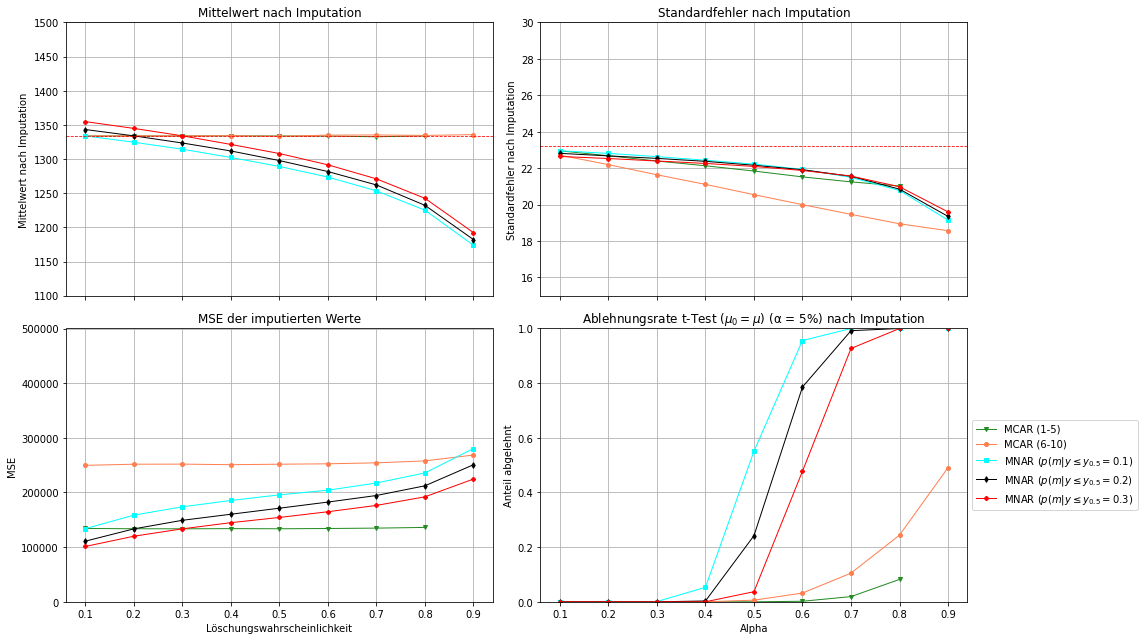

In [34]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs
ax1.grid(True); ax2.grid(True); ax3.grid(True); ax4.grid(True)

# Plotting for the first plot
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1500)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert nach Imputation')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the third plot
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler nach Imputation')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler nach Imputation')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting for the second plot
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE der imputierten Werte')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the fourth plot
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate t-Test ($\mu_0 = \mu$) (\u03B1 = 5%) nach Imputation')
ax4.set_xlabel('Alpha')
ax4.set_ylabel('Anteil abgelehnt')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.savefig('OLS_Auswertung (neu).pdf')
plt.show()

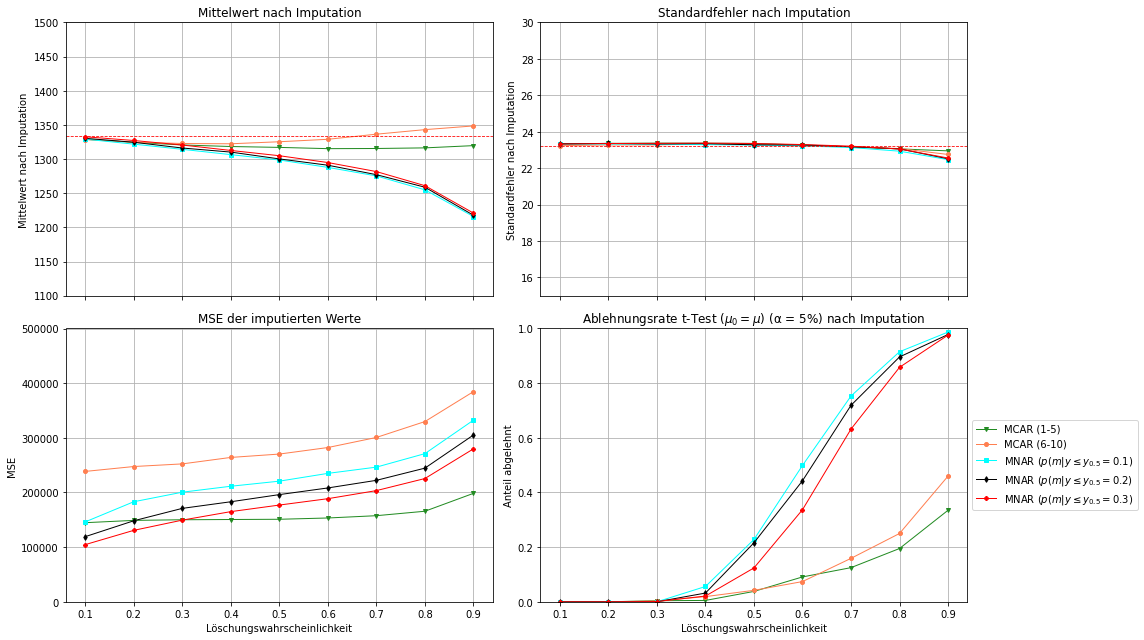

In [35]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs
ax1.grid(True); ax2.grid(True); ax3.grid(True); ax4.grid(True)

# Plotting for the first plot
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1500)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert nach Imputation')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting for the third plot
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler nach Imputation')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler nach Imputation')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting for the second plot
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE der imputierten Werte')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the fourth plot
ax4.plot(df_knn1_MSE['chance'], 1- df_knn1_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax4.plot(df_knn1_MSE['chance'], 1- df_knn1_alpha['Alpha MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax4.plot(df_knn1_MSE['chance'], 1- df_knn1_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax4.plot(df_knn1_MSE['chance'], 1- df_knn1_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax4.plot(df_knn1_MSE['chance'], 1- df_knn1_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate t-Test ($\mu_0 = \mu$) (\u03B1 = 5%) nach Imputation')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Anteil abgelehnt')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax4)

plt.tight_layout()
plt.savefig('1NN-Auswertung (neu).pdf')
plt.show()

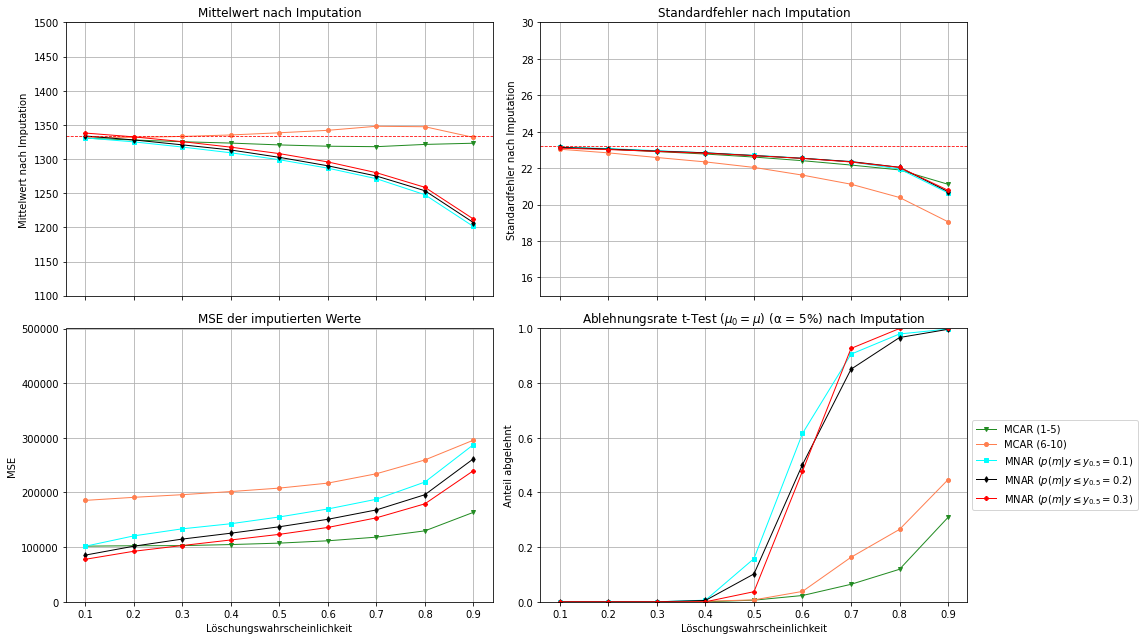

In [36]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs
ax1.grid(True); ax2.grid(True); ax3.grid(True); ax4.grid(True)

# Plotting for the first plot
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1500)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert nach Imputation')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting for the third plot
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler nach Imputation')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler nach Imputation')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting for the second plot
ax3.plot(df_knn3_SE['chance'], df_knn3_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax3.plot(df_knn3_SE['chance'], df_knn3_MSE['MSE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax3.plot(df_knn3_SE['chance'], df_knn3_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax3.plot(df_knn3_SE['chance'], df_knn3_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax3.plot(df_knn3_SE['chance'], df_knn3_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE der imputierten Werte')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the fourth plot
ax4.plot(df_knn3_MSE['chance'], 1-df_knn3_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax4.plot(df_knn3_MSE['chance'], 1-df_knn3_alpha['Alpha MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax4.plot(df_knn3_MSE['chance'], 1-df_knn3_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax4.plot(df_knn3_MSE['chance'], 1-df_knn3_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax4.plot(df_knn3_MSE['chance'], 1-df_knn3_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate t-Test ($\mu_0 = \mu$) (\u03B1 = 5%) nach Imputation')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Anteil abgelehnt')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax4)

plt.tight_layout()
plt.savefig('3NN-Auswertung (neu).pdf')
plt.show()

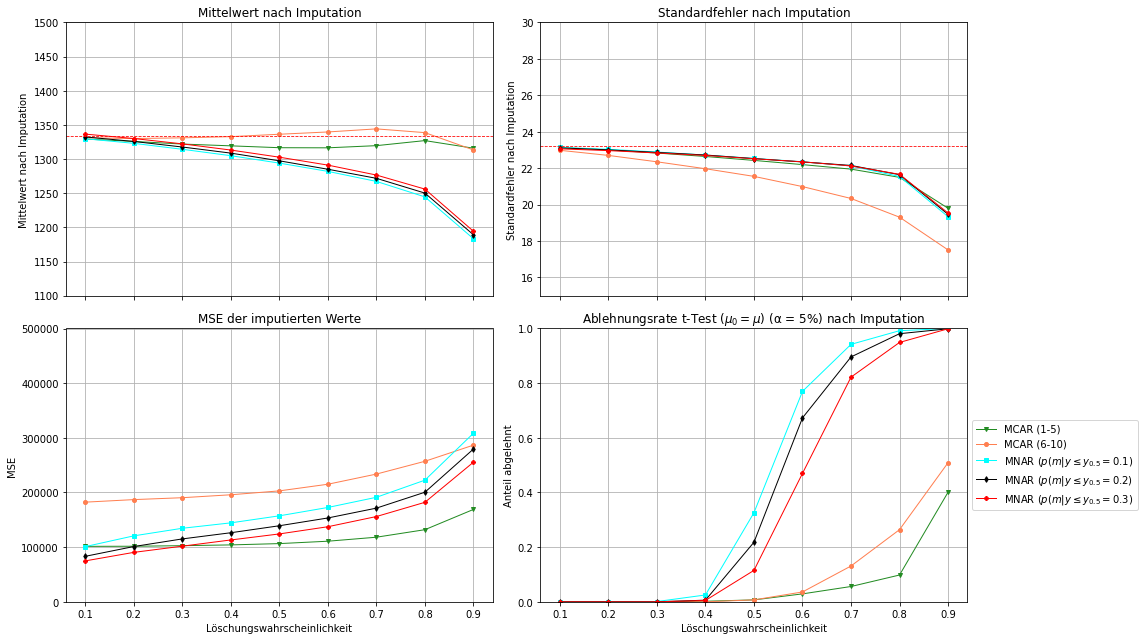

In [37]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs
ax1.grid(True); ax2.grid(True); ax3.grid(True); ax4.grid(True)

# Plotting for the first plot
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1500)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert nach Imputation')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting for the third plot
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler nach Imputation')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler nach Imputation')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting for the second plot
ax3.plot(df_knn5_SE['chance'], df_knn5_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax3.plot(df_knn5_SE['chance'], df_knn5_MSE['MSE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax3.plot(df_knn5_SE['chance'], df_knn5_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax3.plot(df_knn5_SE['chance'], df_knn5_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax3.plot(df_knn5_SE['chance'], df_knn5_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE der imputierten Werte')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the fourth plot
ax4.plot(df_knn5_MSE['chance'], 1-df_knn5_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (1-5)')
ax4.plot(df_knn5_MSE['chance'], 1-df_knn5_alpha['Alpha MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (6-10)')
ax4.plot(df_knn5_MSE['chance'], 1-df_knn5_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.1$)')
ax4.plot(df_knn5_MSE['chance'], 1-df_knn5_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.2$)')
ax4.plot(df_knn5_MSE['chance'], 1-df_knn5_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR ($p(m|y\leq y_{0.5}=0.3$)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate t-Test ($\mu_0 = \mu$) (\u03B1 = 5%) nach Imputation')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Anteil abgelehnt')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax4)

plt.tight_layout()
plt.savefig('5NN-Auswertung (neu).pdf')
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


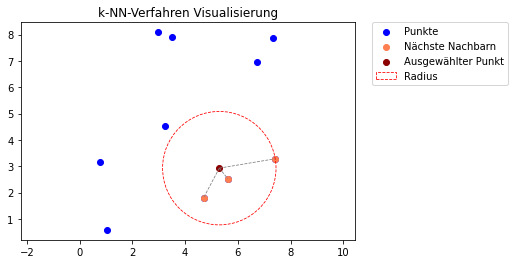

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Generiere zufällige Punkte
np.random.seed(69)
points = np.random.rand(10, 2)*10

# Wähle zufällig einen Punkt aus
query_point = np.random.rand(1, 2)*10

# Berechne die 3 nächsten Nachbarn des ausgewählten Punktes
nbrs = NearestNeighbors(n_neighbors=3, algorithm='auto').fit(points)
distances, indices = nbrs.kneighbors(query_point)

# Extrahiere die Indizes der 3 nächsten Nachbarn
nearest_neighbors_indices = indices.flatten()

# Plotte die Punkte
plt.scatter(points[:, 0], points[:, 1], c='blue', label='Punkte')
plt.scatter(points[nearest_neighbors_indices, 0], points[nearest_neighbors_indices, 1], c='coral', marker='o', label='Nächste Nachbarn')
plt.scatter(query_point[:, 0], query_point[:, 1], c='darkred', marker='o', label='Ausgewählter Punkt')

# Berechne den Radius des Kreises um den ausgewählten Punkt
radius = distances.flatten()[-1] + 0.01

# Zeichne den Kreis um den ausgewählten Punkt
circle = plt.Circle((query_point[:, 0], query_point[:, 1]), radius, color='red', fill=False, linewidth = 0.8, linestyle='--', label='Radius')
plt.gca().add_patch(circle)

# Zeichne Linien zwischen dem ausgewählten Punkt und seinen nächsten Nachbarn
for neighbor_index in nearest_neighbors_indices:
    neighbor_point = points[neighbor_index]
    plt.plot([query_point[:, 0], neighbor_point[0]], [query_point[:, 1], neighbor_point[1]], color='gray', linewidth = 0.8, linestyle='--')

plt.xlim([0, 10])

# Setze die Achsenbeschriftung und die Legende
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., markerscale=1)

# Zeige den Plot an
plt.axis('equal')
plt.title('k-NN-Verfahren Visualisierung')
plt.show()


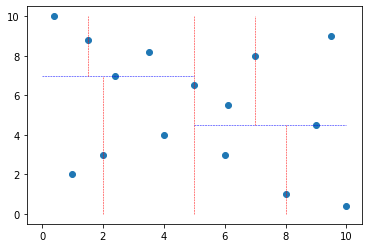

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Erstellen von zufälligen Punkten
points = np.array([[1,2], [6,3], [5,6.5], [7,8], [8,1], [9,4.5], [2.4, 7], [3.5, 8.2], [1.5, 8.8], [0.4, 10], [10, 0.4], [6.1, 5.5], [9.5, 9], [2,3], [4,4]])

# Punkte plotten
plt.scatter(points[:, 0], points[:, 1])

# Vertikale, rote, gestrichelte Linie
plt.plot([5, 5], [0, 10], 'r--', linewidth=0.5)

# Horizontale, blaue, gestrichelte Linien
plt.plot([0, 5], [7, 7], 'b--', linewidth=0.5)
plt.plot([5, 10], [4.5, 4.5], 'b--', linewidth=0.5)

plt.plot([7, 7], [4.5, 10], 'r--', linewidth=0.5)
plt.plot([2, 2], [0, 7], 'r--', linewidth=0.5)

# Weitere vertikale, rote, gestrichelte Linien
plt.plot([1.5, 1.5], [7, 10], 'r--', linewidth=0.5)
plt.plot([8, 8], [0, 4.5], 'r--', linewidth=0.5)




plt.savefig("Visualisierung KD-Tree.pdf")

plt.show()


